In [1]:
#forecast the ssales fro the 1 year for the furniture category 
#ont the basis of the historical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the data
df = pd.read_excel(r'C:\Users\Amal\Downloads\Sample - Superstore.xls',header=0)

#printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
furniture=df[df["Category"]=='Furniture']
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
#to convert object into date/time 
#furniture["order date"]=pd.to_datetime(furniture["order date"])




In [8]:
furniture["Order Date"].min(),furniture["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture=furniture[["Order Date", "Sales"]]
furniture.shape

(2121, 2)

In [10]:
furniture=furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [12]:
furniture["Order Date"].value_counts()

2016-09-05    10
2017-10-30     9
2016-12-25     9
2017-11-19     9
2016-12-01     9
              ..
2017-04-15     1
2015-07-24     1
2014-04-19     1
2016-07-21     1
2016-01-23     1
Name: Order Date, Length: 889, dtype: int64

In [13]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [14]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [15]:
furniture=furniture.set_index('Order Date')

In [16]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [17]:
y= furniture['Sales'].resample("M").mean()

In [18]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

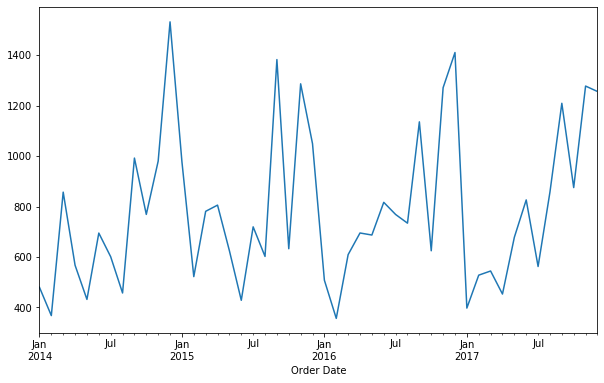

In [19]:
y.plot(figsize=(10,6))
plt.show()

In [20]:
train=y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [21]:
test=y.loc['2017-1-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

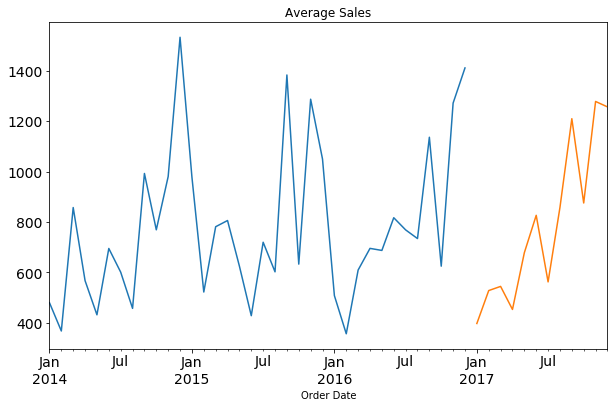

In [22]:
#plotting data   

train.plot(figsize=(10,6), title='Average Sales',fontsize=14)
test.plot(figsize=(10,6), title='Average Sales',fontsize=14)
plt.show()

# exponential soothing

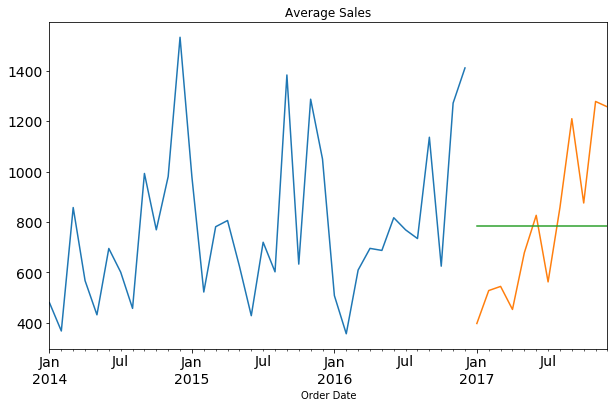

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [24]:
Exp_Smooth.SES

2017-01-31    784.197596
2017-02-28    784.197596
2017-03-31    784.197596
2017-04-30    784.197596
2017-05-31    784.197596
2017-06-30    784.197596
2017-07-31    784.197596
2017-08-31    784.197596
2017-09-30    784.197596
2017-10-31    784.197596
2017-11-30    784.197596
2017-12-31    784.197596
Freq: M, dtype: float64

In [25]:
fit1.aic

415.8766421605101

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.4766733011766


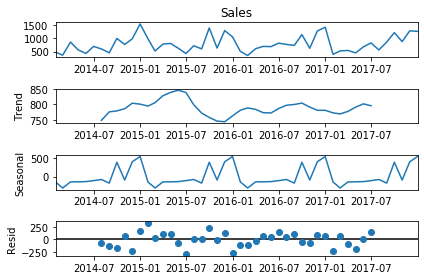

In [27]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

#  double exponential smoothing

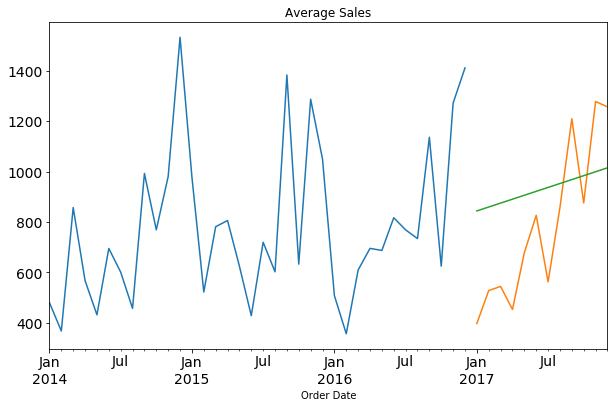

In [28]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [29]:
fit1.aic

427.95435484718445

In [30]:
Holt_df['Holt_linear']

2017-01-31     843.891817
2017-02-28     859.421351
2017-03-31     874.950884
2017-04-30     890.480417
2017-05-31     906.009951
2017-06-30     921.539484
2017-07-31     937.069018
2017-08-31     952.598551
2017-09-30     968.128084
2017-10-31     983.657618
2017-11-30     999.187151
2017-12-31    1014.716684
Freq: M, dtype: float64

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

292.29587863207206


In [32]:
"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

"\nimport numpy as np\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        print(fit1.aic,i,j)\n"

# triple exponential smoothing

C:\Users\Amal\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


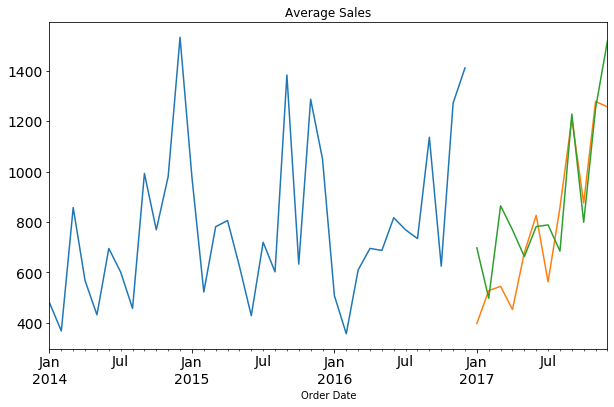

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train, seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
fit1.aic

409.61009297964534

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

193.9119904555351


In [36]:
Holt_Winter_df['Holt_Winter']

2017-01-31     697.446276
2017-02-28     497.588394
2017-03-31     864.315882
2017-04-30     768.699022
2017-05-31     662.864152
2017-06-30     781.841882
2017-07-31     788.346273
2017-08-31     684.608466
2017-09-30    1228.218611
2017-10-31     798.937528
2017-11-30    1250.389125
2017-12-31    1518.097674
Freq: M, dtype: float64

C:\Users\Amal\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


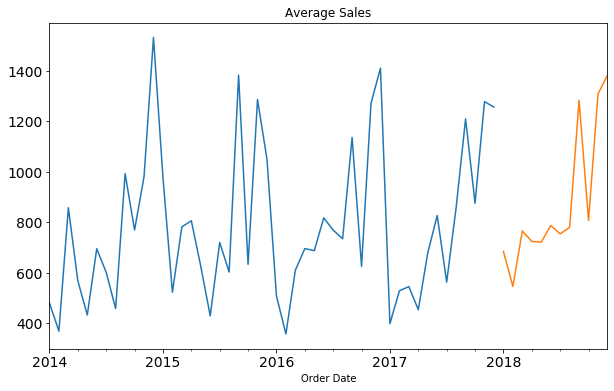

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing

#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(y, seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions=fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions=fit1.forecast(steps=12)
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)

plt.show()

In [38]:
Y_predictions


2018-01-31     683.921825
2018-02-28     545.207348
2018-03-31     765.173324
2018-04-30     723.889520
2018-05-31     720.770902
2018-06-30     786.790119
2018-07-31     753.737287
2018-08-31     779.163793
2018-09-30    1283.404029
2018-10-31     806.498374
2018-11-30    1308.411771
2018-12-31    1382.746676
Freq: M, dtype: float64

In [39]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)

In [40]:
import pmdarima as pm

In [41]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""


'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [42]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.22 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.16 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.05 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.22 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.11 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.25 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.78 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.83 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.52 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [43]:
model.aic()

489.4176261246739

# building sarima model

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order =(3,2,0),seasonal_order=(1,1,0,12)).fit()

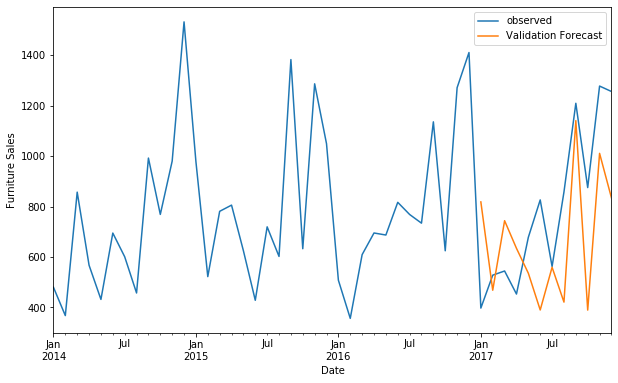

In [57]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [58]:
pred.predicted_mean

2017-01-31     818.524064
2017-02-28     468.470283
2017-03-31     744.079602
2017-04-30     634.497886
2017-05-31     535.745726
2017-06-30     390.163684
2017-07-31     559.376175
2017-08-31     421.341490
2017-09-30    1140.775256
2017-10-31     389.700970
2017-11-30    1011.052383
2017-12-31     834.732202
Freq: M, dtype: float64

In [59]:
Y_pred=pred.predicted_mean
Y_test=y['2017-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

308.76979615185115


In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order =(3,2,0),seasonal_order=(1,1,0,12)).fit()

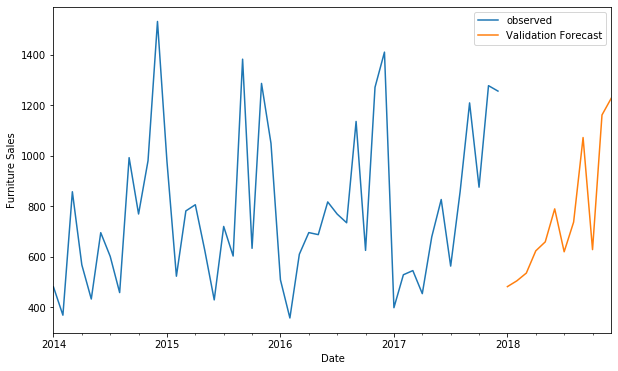

In [62]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [64]:
pred.predicted_mean

2018-01-31     481.175782
2018-02-28     504.162671
2018-03-31     534.896810
2018-04-30     623.058250
2018-05-31     658.537446
2018-06-30     789.387675
2018-07-31     619.269517
2018-08-31     736.930520
2018-09-30    1072.136420
2018-10-31     627.864098
2018-11-30    1161.662889
2018-12-31    1229.291162
Freq: M, dtype: float64

In [65]:
pred.predicted_mean.to_excel("TimeSeriesOutput.xlsx",index=True)